<a href="https://colab.research.google.com/github/fchabni/Python-lectures/blob/main/Diving_ANN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries initialization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

Import data

In [3]:
data_df = pd.read_csv('/content/sample_data/data_diving.csv')
#print(data_df)

In [4]:
X = data_df[["Dive_Depth_m", "Bottom_Time_min", "Water_Temperature_C",
          "Air_Tank_Pressure_bar", "Heart_Rate_bpm", "Experience_Years"]]
y = data_df[["Safety"]]

#print(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
# Normalize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Build ANN model
model = MLPClassifier(hidden_layer_sizes=(16, 8, 4), activation='relu',
                      solver='adam', max_iter=2000, random_state=50)

In [8]:
# Train model
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(16, 8, 4), max_iter=2000, random_state=50)

In [9]:
# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        15

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [10]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


Testing

In [11]:
y_model = model.predict(X)
print(X)

     Dive_Depth_m  Bottom_Time_min  Water_Temperature_C  \
0               8               20                   27   
1              10               25                   26   
2              12               30                   25   
3              14               35                   25   
4              16               40                   24   
..            ...              ...                  ...   
117            53              134                   14   
118            55              139                   14   
119            57              144                   14   
120            59              149                   13   
121            61              154                   13   

     Air_Tank_Pressure_bar  Heart_Rate_bpm  Experience_Years  
0                      210              82                 1  
1                      205              85                 1  
2                      200              88                 1  
3                      195             

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [12]:
print(y_model)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
print(y)

     Safety
0         1
1         1
2         1
3         1
4         1
..      ...
117       0
118       0
119       0
120       0
121       0

[122 rows x 1 columns]


In [14]:
# True labels
y_true = y

# Predicted labels
#y_pred = model.predict(X)
y_pred = model.predict(scaler.transform(X))

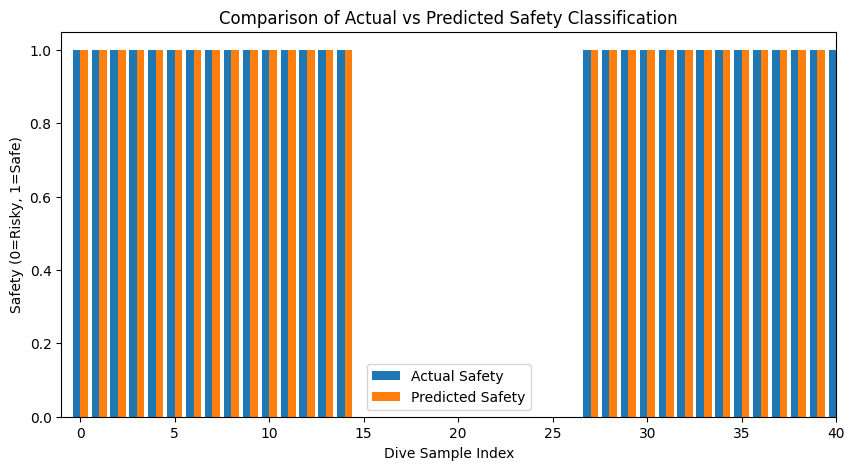

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 1D arrays
y_true = np.array(y_true).ravel()
y_pred = np.array(y_pred).ravel()

indices = np.arange(len(y_true))

plt.figure(figsize=(10,5))
plt.bar(indices - 0.2, y_true, width=0.4, label='Actual Safety')
plt.bar(indices + 0.2, y_pred, width=0.4, label='Predicted Safety')

plt.xlabel('Dive Sample Index')
plt.ylabel('Safety (0=Risky, 1=Safe)')
plt.title('Comparison of Actual vs Predicted Safety Classification')
plt.xlim(-1, 40)
plt.legend()
plt.show()



[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -1. -1. -1. -1. -1. -1. -0. -0. -0. -0. -0. -1. -1. -1. -1. -1.
 -0. -0. -0. -0. -0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


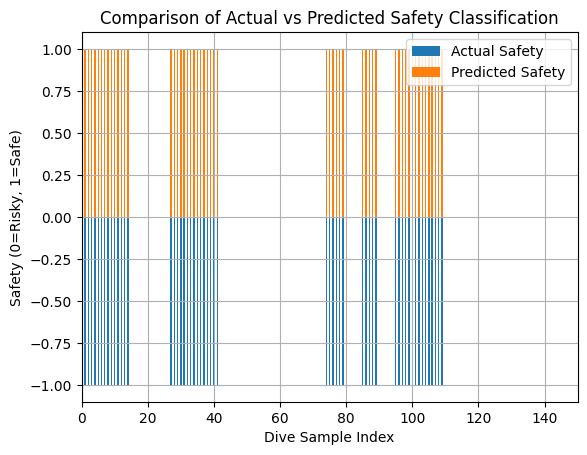

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 1D arrays
y_true = np.array(y_true).ravel()
y_pred = np.array(y_pred).ravel()
y_true_inv=-1.*y_true

print(y_true_inv)
plt.bar(indices, y_true_inv, width=0.4, label='Actual Safety')
plt.bar(indices, y_pred, width=0.4, label='Predicted Safety')
plt.grid(True)
plt.xlabel('Dive Sample Index')
plt.ylabel('Safety (0=Risky, 1=Safe)')
plt.title('Comparison of Actual vs Predicted Safety Classification')
plt.xlim(0, 150)
plt.legend()